# Patient Diagnosis Analysis

In [289]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score, precision_score
from sklearn.metrics import jaccard_score




## Objectives: ##
- Accuracy of Model: (accuracy, f1 score(recall ACC), jquard-index..etc)
- Improvements in the doctor's diagnosis after using AI.
- Patterns in cases where AI disagrees with the ideal answer (e.g., certain fracture types that are harder to detect).
- Influence of AI recommendations on procedure changes (positive or negative impact when diagnosis changes based on AI).
- Instances where the doctor disagrees with both the ideal answer and AI's prediction.
- Instances where AI disagrees with the doctor.

**Final Question**: 
- Do doctors trust AI, and how effective is it in aiding their diagnosis?

  

In [290]:
raw_patients = pd.read_excel('patients.xlsx')
raw_patients.columns

Index(['Datum', 'Unnamed: 1', 'Patient\n(Initialen/Geburtsdat.)', 'Unnamed: 3',
       'Diagnose Arzt vor KI', 'Unnamed: 5', 'Unnamed: 6', 'Befund KI',
       'Unnamed: 8', 'Unnamed: 9', 'Diagnose Arzt nach KI', 'Unnamed: 11',
       'Unnamed: 12', 'Änderung der Diagnose', 'Unnamed: 14', 'Unnamed: 15',
       'Therapie vor KI', 'Unnamed: 17', 'Unnamed: 18', 'Therapie nach KI',
       'Unnamed: 20', 'Änderung der Maßnahme\nnein/ja (In wie fern?)',
       'Unnamed: 22', 'Ausbildungsjahr\n', 'Unnamed: 24',
       'Befund der Kinderradiologen'],
      dtype='object')

In [291]:
raw_patients.head()

,Datum,Unnamed: 1,Patient\n(Initialen/Geburtsdat.),Unnamed: 3,Diagnose Arzt vor KI,Unnamed: 5,Unnamed: 6,Befund KI,Unnamed: 8,Unnamed: 9,...,Therapie vor KI,Unnamed: 17,Unnamed: 18,Therapie nach KI,Unnamed: 20,Änderung der Maßnahme\nnein/ja (In wie fern?),Unnamed: 22,Ausbildungsjahr\n,Unnamed: 24,Befund der Kinderradiologen
0,NaN,NaN,NaN,NaN,keine Fraktur,NaN,NaN,No fracture,NaN,NaN,...,Voltarenverband,NaN,NaN,Voltarenverband,NaN,nein,NaN,5,NaN,"Keine Fraktur,\nPatella Wiberg 2"
1,NaN,NaN,NaN,NaN,isolierte Ulnaschaftfraktur\n (Grünholzfraktur),NaN,NaN,high suspicion fracture,NaN,NaN,...,Oberarm-Gips+ Kontrolle,NaN,NaN,Oberarm-Gips+ Kontrolle,NaN,nein,NaN,5,NaN,Ulnaschaftfraktur
2,NaN,NaN,NaN,NaN,dislozierte Fraktur D5 links\n am Kopf des Gru...,NaN,NaN,"High suspicion fracture, \naber hat Dislokatio...",NaN,NaN,...,Finger-Taping IV. und V links,NaN,NaN,",,",NaN,nein,NaN,8,NaN,dislozierte Fraktur des Köpchens\n der Grundph...
3,NaN,NaN,NaN,NaN,keine Fraktur,NaN,NaN,no fracture,NaN,NaN,...,Voltarenverband,NaN,NaN,",,",NaN,nein,NaN,N?,NaN,Keine Fraktur
4,NaN,NaN,NaN,NaN,keine Fraktur,NaN,NaN,low suspicion fracture,NaN,NaN,...,"trotzdem Gipsschiene, \nweil dies der 2. Stoß ...",NaN,NaN,",,",NaN,nein,NaN,5,NaN,Kein Frakturnahcweis


In [292]:
raw_patients = raw_patients[['Diagnose Arzt vor KI', 'Befund KI', 'Diagnose Arzt nach KI', 'Änderung der Diagnose', 'Befund der Kinderradiologen']]
raw = raw_patients.copy(deep=True)
raw_patients.head()


,Diagnose Arzt vor KI,Befund KI,Diagnose Arzt nach KI,Änderung der Diagnose,Befund der Kinderradiologen
0,keine Fraktur,No fracture,keine Fraktur,nein,"Keine Fraktur,\nPatella Wiberg 2"
1,isolierte Ulnaschaftfraktur\n (Grünholzfraktur),high suspicion fracture,isolierte Ulnaschaftfraktur,nein,Ulnaschaftfraktur
2,dislozierte Fraktur D5 links\n am Kopf des Gru...,"High suspicion fracture, \naber hat Dislokatio...",dislozierte Fraktur D5 links\n am Kopf des Gru...,nein,dislozierte Fraktur des Köpchens\n der Grundph...
3,keine Fraktur,no fracture,keine Fraktur,nein,Keine Fraktur
4,keine Fraktur,low suspicion fracture,keine Fraktur,nein,Kein Frakturnahcweis


In [293]:
for col in raw_patients.columns:
   print(raw_patients[col].value_counts())

Diagnose Arzt vor KI
keine Fraktur                                                              41
Clavicula Fraktur                                                           2
keien Fraktur                                                               2
keine Fraktur,\nOssifikationszentrum nicht sichtbar,\n--> US                1
Radiuswulsfraktur rechts                                                    1
Radiuswulstfraktur                                                          1
keine eindeutige Fraktur,\nV.a. Fraktur am distalen Radius                  1
V.a. Fraktur am Grundphalanx                                                1
V.a. Radiusfraktur links distal                                             1
V.a. Längsfraktur am Grundphalanx D5 links DD Gefäßkanal im Knochen         1
V.a. Längsfraktur an der Ulna                                               1
Fraktur an der Basis des Mittelphalanx D2 links                             1
keine Fraktur, aber unsicher               

In [294]:
negativ = ['keine','keien','Keine','no','No','nein','Kein','kein','nicht sicher frakturtyisch']

raw_patients.replace(negativ, 0, regex=True, inplace=True)
#Make sure there are no negative words left
for col in raw_patients.columns:
   print(f"column: {col}")
   print(raw_patients[col].value_counts())

column: Diagnose Arzt vor KI
Diagnose Arzt vor KI
0                                                                 59
Clavicula Fraktur                                                  2
Fraktur an der Basis des Mittelphalanx D2 links                    1
komplette UA-Schaftfraktur                                         1
distale Radiusfraktur (unsicher),\n                                1
Radiuswulsfraktur rechts                                           1
Radiuswulstfraktur                                                 1
V.a. Fraktur am Grundphalanx                                       1
V.a. Radiusfraktur links distal                                    1
V.a. Längsfraktur an der Ulna                                      1
Wulsfraktur am distalen Radius                                     1
V.a. Fraktur am distalen Femur wegen Fett-pads                     1
UA-Schaftfraktur v.a prox. Radius + distale Ulna                   1
dislozierte komplette distale UA-Fraktur             

In [295]:
binary_list = (raw_patients != 0)
binary_list = binary_list.astype(int)
patients = pd.DataFrame(binary_list)
patients.head()

,Diagnose Arzt vor KI,Befund KI,Diagnose Arzt nach KI,Änderung der Diagnose,Befund der Kinderradiologen
0,0,0,0,0,0
1,1,1,1,0,1
2,1,1,1,0,1
3,0,0,0,0,0
4,0,1,0,0,0


# Model Evaluation:
## 1- Accuracy Score in Binary Classification

In model evaluation for a binary classifier, **accuracy score** calculates the proportion of correct predictions (both positive and negative) out of the total number of predictions. It is defined as:

\[
Accuracy = \frac{\text{Number of correct predictions}}{\text{Total number of predictions}} = \frac{TP + TN}{TP + TN + FP + FN}
\]

Where:
- **TP (True Positives)**: The model correctly predicted the positive class.
- **TN (True Negatives)**: The model correctly predicted the negative class.
- **FP (False Positives)**: The model incorrectly predicted the positive class when it was negative.
- **FN (False Negatives)**: The model incorrectly predicted the negative class when it was positive.




In [296]:
doctor_diagnosis_beforeAi = np.array(patients['Diagnose Arzt vor KI'])
doctor_diagnosis_afterAi = np.array(patients['Diagnose Arzt nach KI'])
Ai_diagnosis = np.array(patients['Befund KI'])
Gold_standard = np.array(patients['Befund der Kinderradiologen'])

In [297]:
accuracy_doctor_diagnosis_beforeAi = accuracy_score(doctor_diagnosis_beforeAi, Gold_standard)
accuracy_doctor_diagnosis_afterAi = accuracy_score(doctor_diagnosis_afterAi, Gold_standard)
accuracy_Ai_diagnosis = accuracy_score(Ai_diagnosis, Gold_standard)
print(f'Accuracy of Doctors before Ai: {accuracy_doctor_diagnosis_beforeAi} \nAccuracy of Doctors after Ai: {accuracy_doctor_diagnosis_afterAi} \nAccuracy of Ai: {accuracy_Ai_diagnosis}')

Accuracy of Doctors before Ai: 0.8080808080808081 
Accuracy of Doctors after Ai: 0.8585858585858586 
Accuracy of Ai: 0.9090909090909091


here we can start to notice that the accuracy of the doctor's diagnosis improved after using Ai.

## 2- Jaccard Index in a Binary Classifier

The **Jaccard Index**, also known as the **Jaccard similarity coefficient**, is a metric used to evaluate the similarity between two sets of data. In the context of a binary classifier, it measures the intersection over union of the predicted positive instances and the actual positive instances.

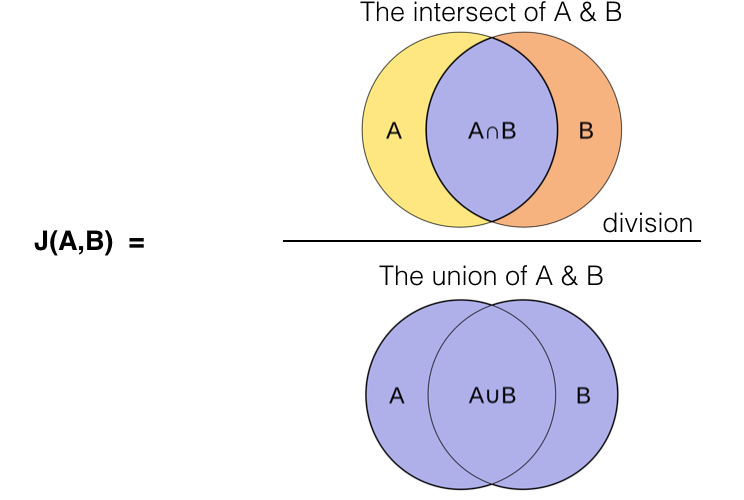

In [298]:
from IPython.display import Image, display
display(Image(filename='Jaccard_index.png'))

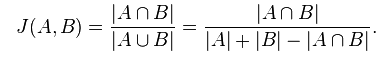

In [299]:

display(Image(filename='Jaccard_index_formula.png'))

In [300]:
#Reference
#1:https://www.bing.com/images/search?view=detailV2&ccid=R7OeruOt&id=CB2FB34B1110AE0FF1504369C8D02F4902802B3B&thid=OIP.R7OeruOtIk4Js4jlp8C_dQHaE-&mediaurl=https%3a%2f%2fmiro.medium.com%2fv2%2fresize%3afit%3a744%2f1*XiLRKr_Bo-VdgqVI-SvSQg.png&cdnurl=https%3a%2f%2fth.bing.com%2fth%2fid%2fR.47b39eaee3ad224e09b388e5a7c0bf75%3frik%3dOyuAAkkv0MhpQw%26pid%3dImgRaw%26r%3d0&exph=500&expw=744&q=jaccard+index&simid=608054468191060378&FORM=IRPRST&ck=17E5E74F1F4F349D91B67B0005D091BA&selectedIndex=0&itb=0
#2: https://th.bing.com/th/id/R.f8431099301881554edc28275092be3c?rik=Pz98dUJWbx90IA&riu=http%3a%2f%2fblog.stratio.com%2fwp-content%2fuploads%2f2017%2f01%2fImage-2-%E2%80%93-Jaccard-Index-formula.png&ehk=mPsG%2bYR%2b49kvtHD9laZdGsHCT0Apk8rG6TbxQfQaddA%3d&risl=&pid=ImgRaw&r=0


The Jaccard Index ranges from 0 to 1:
- **1** means perfect agreement (all predicted positives are correct and all actual positives are predicted).
- **0** means no agreement (the classifier failed to predict any positives correctly).

In essence, the Jaccard Index measures the proportion of positive instances that are correctly identified by the classifier, considering both false positives and false negatives. This makes it useful in situations where you want to assess the overlap between actual and predicted positives.


In [301]:
jaccard_doctor_diagnosis_beforeAi = jaccard_score(doctor_diagnosis_beforeAi, Gold_standard)
jaccard_doctor_diagnosis_afterAi = jaccard_score(doctor_diagnosis_afterAi, Gold_standard)
jaccard_Ai_diagnosis = jaccard_score(Ai_diagnosis, Gold_standard)
print(f'Jaccard Index of Doctors before Ai: {jaccard_doctor_diagnosis_beforeAi} \nJaccard Index of Doctors after Ai: {jaccard_doctor_diagnosis_afterAi} \nJaccard Index of Ai: {jaccard_Ai_diagnosis}')

Jaccard Index of Doctors before Ai: 0.5869565217391305 
Jaccard Index of Doctors after Ai: 0.6818181818181818 
Jaccard Index of Ai: 0.7631578947368421


## 3- Confusion Matrix in Binary Classification:
### 3.1- Recall (Sensitivity) 
### 3.2- Accuracy
### 3.3- f1-score



In [302]:
patients.head()

,Diagnose Arzt vor KI,Befund KI,Diagnose Arzt nach KI,Änderung der Diagnose,Befund der Kinderradiologen
0,0,0,0,0,0
1,1,1,1,0,1
2,1,1,1,0,1
3,0,0,0,0,0
4,0,1,0,0,0


In [303]:
cm = confusion_matrix(doctor_diagnosis_beforeAi, Gold_standard)
print(cm)


[[53  6]
 [13 27]]


In [304]:
import plotly.express as px
cm_df = pd.DataFrame(cm, index=["No Fracture", "Fracture"], columns=["No Fracture", "Fracture"])

# Plotly heatmap
fig = px.imshow(cm_df, text_auto=True, labels=dict(x="Predicted", y="Actual", color="Count"), 
                title="Confusion Matrix of doctor before Ai")
fig.show()

Recall (also known as sensitivity or true positive rate) tells you what proportion of actual positives were correctly predicted. It is calculated using the following formula:


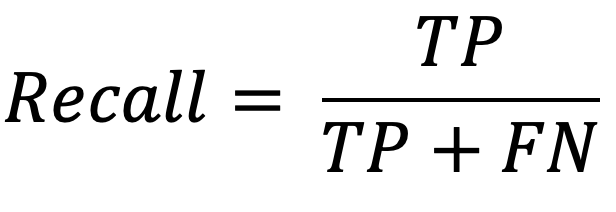

In [305]:
display(Image(filename='recall.png'))

In [306]:
recall = recall_score(doctor_diagnosis_beforeAi, Gold_standard)
print(f'Sensitivity (Recall): {recall}')

Sensitivity (Recall): 0.675


Precision tells you what proportion of predicted positives were actually positive. It is calculated using the following formula:

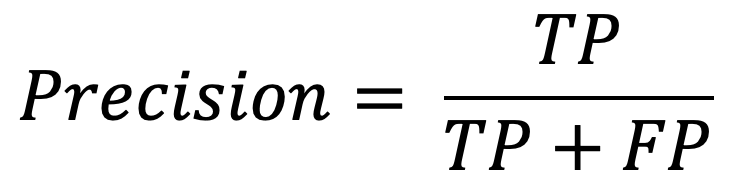

In [307]:
display(Image(filename='precision.png'))

In [308]:
precision = precision_score(doctor_diagnosis_beforeAi, Gold_standard)
print(f'Precision: {precision}')

Precision: 0.8181818181818182


### F1 Score in Binary Classification
The **F1 score** is a metric used to evaluate the performance of a binary classification model. It is the harmonic mean of precision and recall, providing a balance between the two metrics. The F1 score is particularly useful when you need to consider both false positives and false negatives, especially in imbalanced datasets.

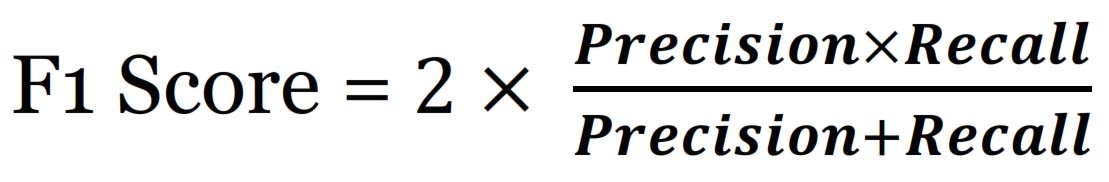

In [309]:
display(Image(filename='f1score.jpg'))

In [310]:
f1 = f1_score(doctor_diagnosis_beforeAi, Gold_standard)  
print(f'F1 Score: {f1}')

F1 Score: 0.7397260273972603


In [311]:
cm = confusion_matrix(Ai_diagnosis, Gold_standard)
cm_df = pd.DataFrame(cm, index=["No Fracture", "Fracture"], columns=["No Fracture", "Fracture"])

# Plotly heatmap
fig = px.imshow(cm_df, text_auto=True, labels=dict(x="Predicted", y="Actual", color="Count"), 
                title="Confusion Matrix of Ai")
fig.show()

In [312]:
recall = recall_score(Ai_diagnosis, Gold_standard)
print(f'Sensitivity (Recall): {recall}')

Sensitivity (Recall): 0.8529411764705882


In [313]:
precision = precision_score(Ai_diagnosis, Gold_standard)
print(f'Precision: {precision}')

Precision: 0.8787878787878788


In [314]:
f1 = f1_score(Ai_diagnosis, Gold_standard)
print(f'F1 Score: {f1}')

F1 Score: 0.8656716417910447


# Exploratory Data Analysis:

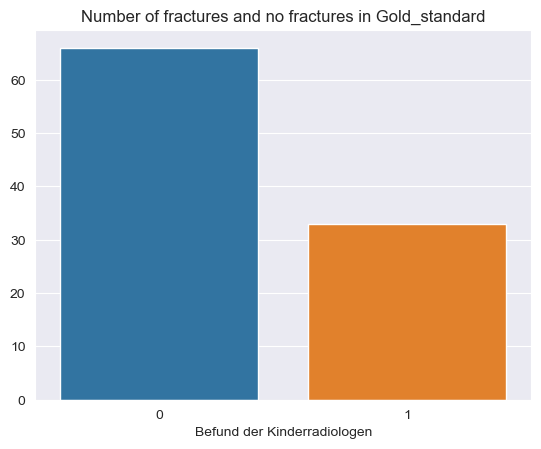

In [315]:
#number of fractures and no fractures in Gold_standard
#check if the data is balanced
patients['Befund der Kinderradiologen'].value_counts()
sns.barplot(x=patients['Befund der Kinderradiologen'].value_counts().index, y=patients['Befund der Kinderradiologen'].value_counts().values)

plt.title('Number of fractures and no fractures in Gold_standard')
plt.show()


### Accuracy comparison between doctor diagnosi before and after Ai:

C:\Users\shels\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning:

unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.



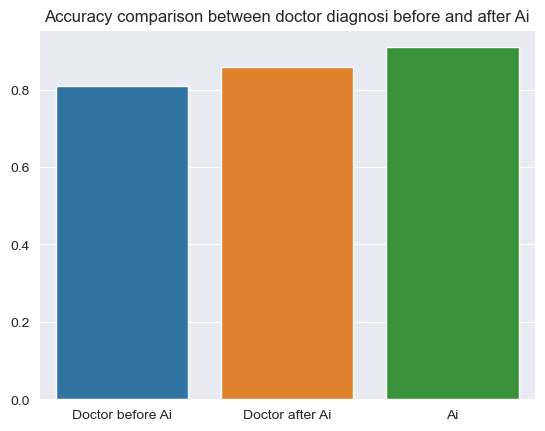

In [316]:
sns.barplot(x=['Doctor before Ai', 'Doctor after Ai', 'Ai'], y=[accuracy_doctor_diagnosis_beforeAi, accuracy_doctor_diagnosis_afterAi, accuracy_Ai_diagnosis])
plt.title('Accuracy comparison between doctor diagnosi before and after Ai')
plt.show()

### Error Analysis:
#### 1-Case where doctor diagrees with Ai, which one is correct?

In [317]:
error_analysis = patients[patients['Diagnose Arzt vor KI'] != patients['Befund KI']]
print(f"Number of cases where doctor diagrees with Ai: {len(error_analysis)}")
error_analysis = error_analysis[error_analysis['Diagnose Arzt vor KI'] == error_analysis['Befund der Kinderradiologen']]
print(f"Number of cases where doctor diagrees with Ai and doctor is correct: {len(error_analysis)}")

Number of cases where doctor diagrees with Ai: 22
Number of cases where doctor diagrees with Ai and doctor is correct: 6


### 2-Case where Doctor changed his diagnosis after Ai:

In [318]:
doctor_changed = patients[patients['Diagnose Arzt vor KI'] != patients['Diagnose Arzt nach KI']]
print(f"Number of cases where doctor changed his diagnosis after Ai: {len(doctor_changed)}")


Number of cases where doctor changed his diagnosis after Ai: 11


In [319]:
patients['change_in_procedure'] = patients['Diagnose Arzt vor KI'] != patients['Diagnose Arzt nach KI']
# Add a new column to indicate AI agreement
patients['ai_agreement'] = patients['Befund KI'] == patients['Diagnose Arzt vor KI']
patients['ai_agreement'] = patients['ai_agreement'].replace({True: 'Agree', False: 'Disagree'})
summary = patients.groupby(['ai_agreement', 'change_in_procedure']).size().unstack(fill_value=0)
print(summary)


change_in_procedure  False  True 
ai_agreement                     
Agree                   73      4
Disagree                15      7


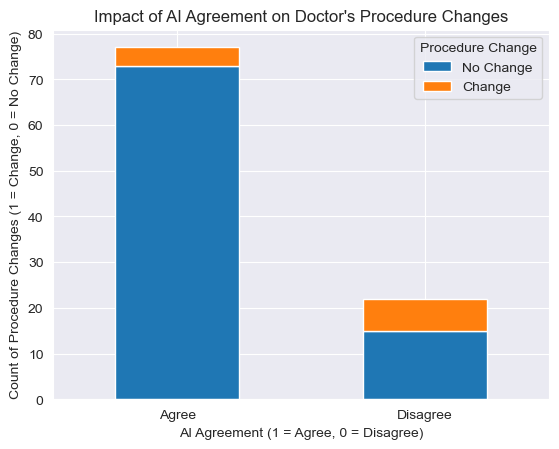

In [321]:
summary.plot(kind='bar', stacked=True)

plt.title('Impact of AI Agreement on Doctor\'s Procedure Changes')
plt.xlabel('AI Agreement (1 = Agree, 0 = Disagree)')
plt.ylabel('Count of Procedure Changes (1 = Change, 0 = No Change)')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.legend(title='Procedure Change', labels=['No Change', 'Change'], loc='upper right')
plt.show()

#### 2.1- were the changes correct?


In [322]:
before = (doctor_changed['Diagnose Arzt vor KI'] == doctor_changed['Befund der Kinderradiologen']).sum()
after = (doctor_changed['Diagnose Arzt nach KI'] == doctor_changed['Befund der Kinderradiologen']).sum()
print(f"Number of cases where doctor changed his diagnosis to correct ones: {after-before}")

Number of cases where doctor changed his diagnosis to correct ones: 5


In part 2 Subgroup Analaysis are performed to check if AI performance varies significantly across subgroups, with a larger dataset of Ai against the gold standard. In additions conclusions and answers will be derived from the analysis.

## Subgroup Analysis:
Segment the data by demographic features or by fracture type,where Ai incorrectly performs to check if AI performance varies significantly across subgroups.

In [323]:
check = (patients['Befund KI'] != patients['Befund der Kinderradiologen'])
raw['Befund der Kinderradiologen'].value_counts()
incorrect['Befund der Kinderradiologen'].value_counts()


Befund der Kinderradiologen
0                                      5
nicht dislozierte Fraktur              1
nicht dislozierte Radiuswulsfraktur    1
Name: count, dtype: int64

Ai fails to indentify the following fractures:...